In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pyproj import Proj, transform

In [89]:
df = pd.read_csv('lieux-de-tournage-a-paris-csv.csv',sep=";",engine='python')
df.head()
df.shape

(8919, 14)

In [90]:
#Nombre de séries/film différents (différents du nombre de lignes!)
print("Nombre de séries/film différents : ",df['Titre'].nunique())

#Nombre de types de tournage
print("Nombre de types de tournage : ",df['Type de tournage'].nunique(), "(Long métrage, Série TV, Série Web, Téléfilm)")

Nombre de séries/film différents :  1055
Nombre de types de tournage :  4 (Long métrage, Série TV, Série Web, Téléfilm)


In [91]:
df.count()

Identifiant du lieu         8919
Année du tournage           8919
Type de tournage            8919
Titre                       8919
Réalisateur                 8698
Producteur                  8907
Localisation de la scène    8919
Code postal                 8918
Date de début               8919
Date de fin                 8919
Coordonnée en X             8919
Coordonnée en Y             8919
geo_shape                   8919
geo_point_2d                8919
dtype: int64

In [92]:
df.mean()

Année du tournage     2017.669358
Code postal          75031.370150
Coordonnée en X          2.343330
Coordonnée en Y         48.862617
dtype: float64

In [93]:
df.nunique()

Identifiant du lieu         8919
Année du tournage              5
Type de tournage               4
Titre                       1055
Réalisateur                  930
Producteur                   636
Localisation de la scène    5827
Code postal                   24
Date de début               1385
Date de fin                 1453
Coordonnée en X             5564
Coordonnée en Y             5547
geo_shape                   5573
geo_point_2d                5573
dtype: int64

In [94]:
df.sort_values(['Code postal']).head(20)

,Identifiant du lieu,Année du tournage,Type de tournage,Titre,Réalisateur,Producteur,Localisation de la scène,Code postal,Date de début,Date de fin,Coordonnée en X,Coordonnée en Y,geo_shape,geo_point_2d
2278,2019-867,2019,Série TV,Emily in Paris,NaN,NW2020,"6 place de valois, 75001 paris",75001.0,2019-07-11,2019-07-12,2.338230,48.863117,"{""type"": ""Point"", ""coordinates"": [2.3382304529...","48.8631168142,2.33823045299"
7042,2019-1673,2019,Série TV,SI tu vas bien,Tien-Jen HUANG,Vilmus Media,"pont des arts, 75001 paris",75001.0,2019-11-30,2019-11-30,2.337547,48.858389,"{""type"": ""Point"", ""coordinates"": [2.3375467712...","48.8583886156,2.3375467712"
4983,2020-104,2020,Série TV,Dix pour cent - Saison 4,Antoine GARCEAU - Marc FITOUSSI,Mon Voisin productions,"149 rue saint-honoré, 75001 paris",75001.0,2020-02-10,2020-02-10,2.339732,48.861983,"{""type"": ""Point"", ""coordinates"": [2.3397323147...","48.8619825964,2.33973231478"
449,2020-1148,2020,Long métrage,EN CORPS,CEDRIC KLAPISCH,CE QUI ME MEUT,"pont neuf, 75001 paris",75001.0,2020-12-21,2020-12-21,2.342487,48.858493,"{""type"": ""Point"", ""coordinates"": [2.3424874510...","48.8584933075,2.34248745106"
2516,2016-2526,2016,Long métrage,TELLE MERE TELLE FILLE,NOEMIE SAGLIO,PAN EUROPENNE PRODUCTION,1 PLACE DU CHATELET,75001.0,2016-07-18,2016-07-19,2.346755,48.857600,"{""type"": ""Point"", ""coordinates"": [2.3467549996...","48.8575999996,2.3467549996"
4889,2020-34,2020,Série TV,Arsène Lupin,Louis LETERRIER,Gaumont production télévision,"pont des arts, 75001 paris",75001.0,2020-01-15,2020-01-15,2.337547,48.858389,"{""type"": ""Point"", ""coordinates"": [2.3375467712...","48.8583886156,2.3375467712"
5934,2020-721,2020,Série TV,Arsène Lupin,Hugo GÉLIN,Gaumont production télévision,"2 rue edouard colonne, 75001 paris",75001.0,2020-10-30,2020-10-30,2.345636,48.857845,"{""type"": ""Point"", ""coordinates"": [2.3456356765...","48.8578446401,2.34563567658"
5767,2017-274,2017,Série TV,"ALICE NEVERS episodes 92, 93 saison 14",ERIC LE ROUX,EGO PRODUCTIONS,"rue de harlay, 75001 paris",75001.0,2017-04-24,2017-04-24,2.343181,48.856578,"{""type"": ""Point"", ""coordinates"": [2.3431814590...","48.856578173,2.34318145906"
4077,2019-128,2019,Long métrage,Les hommes de Namsan,Min-Ho Woo,KEYSTONE FILMS,"1 rue montorgueil, 75001 paris",75001.0,2019-02-15,2019-02-15,2.346207,48.863320,"{""type"": ""Point"", ""coordinates"": [2.3462070342...","48.8633198041,2.34620703424"
5135,2016-243,2016,Série TV,CHRONIQUES PARISIENNES,ZABOU BREITMAN,LES FILMS DU KIOSQUE,SQUARE DE LA PLACE DAUPHINE,75001.0,2016-10-01,2016-10-01,2.342303,48.856822,"{""type"": ""Point"", ""coordinates"": [2.3423030000...","48.8568219999,2.34230300001"


In [95]:
# 'float' to 'String' type (Code postal)
df['Code postal'] = df['Code postal'].astype(str)
df[df['Code postal'].str.startswith("75")].head()

,Identifiant du lieu,Année du tournage,Type de tournage,Titre,Réalisateur,Producteur,Localisation de la scène,Code postal,Date de début,Date de fin,Coordonnée en X,Coordonnée en Y,geo_shape,geo_point_2d
0,2019-173,2019,Long métrage,IBRAHIM,SAMIR GUESMI,WHY NOT PRODUCTIONS,"29 boulevard auguste blanqui, 75013 paris",75013.0,2019-02-22,2019-02-22,2.352559,48.830116,"{""type"": ""Point"", ""coordinates"": [2.3525586756...","48.8301164772,2.3525586756"
1,2019-176,2019,Série TV,Le Bazar de la Charité,Alexandre Laurent,quad fantastico télévisons Le bazar de la Charité,"21 rue gracieuse, 75005 paris",75005.0,2019-03-04,2019-03-04,2.351335,48.842919,"{""type"": ""Point"", ""coordinates"": [2.3513345620...","48.8429193101,2.35133456201"
2,2019-515,2019,Série TV,PLATANE SAISON 3,ERIC JUDOR,4 MECS EN BASKETS,"9 avenue hoche, 75008 paris",75008.0,2019-05-20,2019-05-20,2.303760,48.877212,"{""type"": ""Point"", ""coordinates"": [2.3037596788...","48.8772122978,2.30375967881"
3,2019-522,2019,Série TV,The Eddy,Damien Chazelle,atlantique productions,"28 boulevard jourdan, 75014 paris",75014.0,2019-05-23,2019-05-24,2.334607,48.821424,"{""type"": ""Point"", ""coordinates"": [2.3346071504...","48.8214241259,2.33460715041"
4,2018-819,2018,Série TV,Munch saison 2,frederic Berthe,EXILENE,"rue thomas mann, 75013 paris",75013.0,2018-07-13,2018-07-13,2.378161,48.829173,"{""type"": ""Point"", ""coordinates"": [2.3781606591...","48.8291726829,2.37816065911"


In [96]:
#Nombre de tournages en fonction de l'arrondissement
df['Arrondissement'] = df['Code postal'].str[3:5] #Attention aux départements qui ne commencent pas par 75
df.groupby('Arrondissement')["Code postal"].count() #Attention tournages d'un même film à plusieurs endroits

Arrondissement
        1
00      4
01    497
02    219
03    164
04    497
05    469
06    327
07    472
08    546
09    493
10    558
11    435
12    433
13    465
14    250
15    248
16    788
17    277
18    716
19    603
20    457
Name: Code postal, dtype: int64

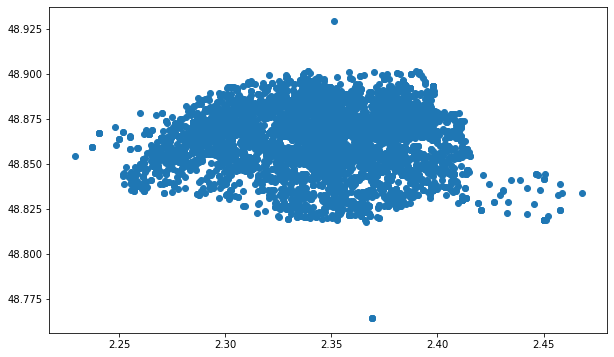

In [97]:
plt.figure(figsize = (10,6))
X = df['Coordonnée en X']
Y = df['Coordonnée en Y']
plt.scatter(X,Y)

In [98]:
#Erreur sur 2 lignes
#Attention : ne lancer qu'une fois sinon ça divise
errors = df.loc[df['Coordonnée en Y']>50].index
df.at[errors[0],'Coordonnée en Y'] = df.at[errors[0],'Coordonnée en Y']/1000
df.at[errors[1],'Coordonnée en Y'] = df.at[errors[1],'Coordonnée en Y']/1000

IndexError: index 0 is out of bounds for axis 0 with size 0

Text(0.5, 1.0, 'Localisation des différents tournages')

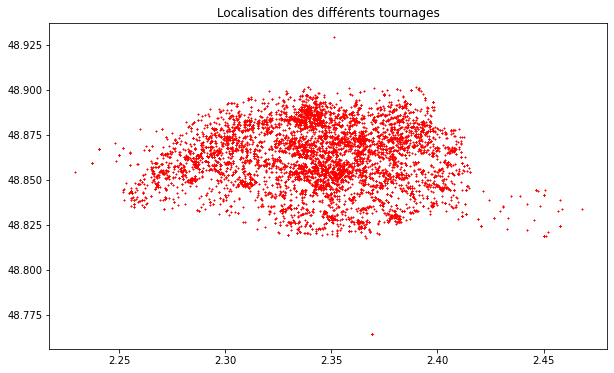

In [99]:
#Représentation des localisations des tournages (rajouter carte de Paris en-dessous)
plt.figure(figsize = (10,6))
plt.scatter(X,Y,s=1,c='r',marker='x')
plt.title('Localisation des différents tournages')

Text(0.5, 1.0, 'Localisation des différents types de tournage')

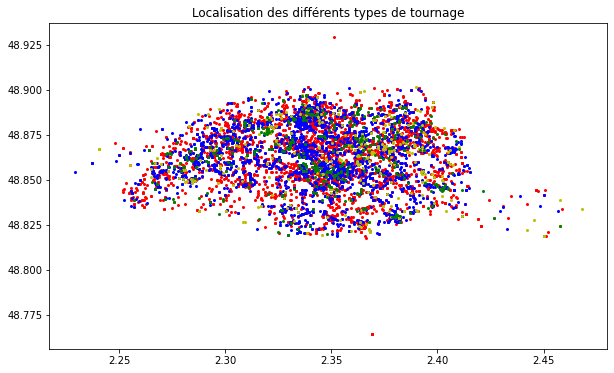

In [100]:
#Séparer localisations des 4 différents types de tournages
long_metrage = df[df['Type de tournage'].str.startswith("Long métrage")]
serie_tv = df[df['Type de tournage'].str.startswith("Série TV")]
serie_web = df[df['Type de tournage'].str.startswith("Série Web")]
telefilm = df[df['Type de tournage'].str.startswith("Téléfilm")]

X_long_metrage = long_metrage['Coordonnée en X']
Y_long_metrage = long_metrage['Coordonnée en Y']

X_serie_tv = serie_tv['Coordonnée en X']
Y_serie_tv = serie_tv['Coordonnée en Y']

X_serie_web = serie_web['Coordonnée en X']
Y_serie_web = serie_web['Coordonnée en Y']

X_telefilm = telefilm['Coordonnée en X']
Y_telefilm = telefilm['Coordonnée en Y']

plt.figure(figsize = (10,6))
plt.scatter(X_long_metrage,Y_long_metrage,s=4,c='r',marker='o',label='Long métrage')
plt.scatter(X_serie_tv,Y_serie_tv,s=4,c='b',marker='o',label='Série TV')
plt.scatter(X_serie_web,Y_serie_web,s=4,c='y',marker='o',label='Série Web')
plt.scatter(X_telefilm,Y_telefilm,s=4,c='g',marker='o',label='Téléfilm')
plt.title('Localisation des différents types de tournage')


In [15]:
##Partie 2 Pablito


In [141]:
df1 = pd.read_csv('lieux-culture-paris-csv.csv',sep=";",engine='python')
df2 = pd.read_csv('jardin_remarquable.csv',sep=";",engine='python')
df1=df1[df1["DEP"]==75]# prendre les donnnes à Paris
#df1.head()
#type(df1["DEP"][0])
#df1[df1["DEP"]==75]
# localisation des lieux culturels de paris
#df1.iloc[:,5:15]
df1

,NOM_LIEU,DEP,COMMUNE,CODE_INSEE,CODE_POSTAL,RAYONNEMENT,GPE_800M,GPE_STATION,GPE_LIGNE,CARTO_BIB,...,C_SUF3,C_DESI,C_LIAISON,L_VOIE,N_SQ_EP,C_NIV1,C_NIV2,C_NIV3,COORD_X,COORD_Y
1,Acad�mie de Danse Barbot Perrot - Danse,75,Paris 17e Arrondissement,75117,75017.0,3.0,Oui,Pont Cardinet,GPE - L14,NaN,...,,RUE,DE,TOCQUEVILLE,753000955,13,132,13211,"649665,6055","6864963,345"
2,Acad�mie de Guitare,75,Paris 13e Arrondissement,75113,75013.0,3.0,Oui,Maison Blanche - Paris XIIIe,GPE - L14,NaN,...,,PAS,DU,MOULINET,753000741,13,132,13211,"652582,4279","6858678,034"
7,Association Cours Hippolyte,75,Paris 17e Arrondissement,75117,75017.0,3.0,Oui,Pont Cardinet,GPE - L14,NaN,...,,RUE,,CARDINET,753000238,13,132,13211,"649494,3526","6865273,196"
8,Atelier d'Artistes,75,Paris 17e Arrondissement,75117,75017.0,3.0,Oui,Pont Cardinet,GPE - L14,NaN,...,,RUE,DES,DAMES,753000100,13,134,13413,"649885,9789","6864951,506"
9,Atelier de Recherche Chor�graphique - Danse,75,Paris 13e Arrondissement,75113,75013.0,3.0,Oui,Maison Blanche - Paris XIIIe,GPE - L14,NaN,...,,AV,DE,CHOISY,753000625,13,132,13211,"652891,0986","6858846,595"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,Ya d'la Voix!,75,Paris 11e Arrondissement,75111,75011.0,3.0,Non,NaN,NaN,NaN,...,,RUE,DU,FAUBOURG SAINT-ANTOINE,753000231,13,132,13211,"654542,7794","6861344,802"
2516,Yamaha Music School,75,Paris 12e Arrondissement,75112,75012.0,3.0,Non,NaN,NaN,NaN,...,,RUE,DE,BERCY,753000573,13,132,13211,"654566,7052","6860013,456"
2517,Yvon Lambert,75,Paris 3e Arrondissement,75103,75003.0,3.0,Non,NaN,NaN,NaN,...,,RUE,,VIEILLE DU TEMPLE,753000707,13,133,13321,"653252,2938","6862513,695"
2519,Archives Nationales Site Paris,75,Paris 3e Arrondissement,75103,75003.0,1.0,Non,NaN,NaN,NaN,...,NaN,RUE,DES,FRANCS BOURGEOIS,751009138,13,131,13121,"652844,2208","6862406,13"


In [142]:
df1.count()

NOM_LIEU                    1107
DEP                         1107
COMMUNE                     1107
CODE_INSEE                  1107
CODE_POSTAL                 1105
RAYONNEMENT                  951
GPE_800M                    1107
GPE_STATION                   45
GPE_LIGNE                     45
CARTO_BIB                     63
BIB_RECENT2000                62
BIB_OUV_DIM                   63
BIB_SURFM2                    60
BIB_GESTION                   63
BIB_CODE_OBS_LIVRE            57
CARTO_CINEMA                  85
CINE_TYPE                     85
CINE_NBRE_ECRAN               85
CARTO_MUSEE                   95
MUSEE_TYPE                    88
CENTRE_INTERPRETATION         17
CARTO_EXPO                   100
EXPO_TYPE                    130
EXPO_TRAM                      9
CARTO_PATRIMOINE               8
MAISON_ILLUSTRES               8
CARTO_SPECTACLE              298
SPECT_TYPE                   298
RES_G20_T                      0
RES_ACTES_IF                   9
CARTO_ENSE

In [143]:
df1.nunique()

NOM_LIEU                    1071
DEP                            1
COMMUNE                       20
CODE_INSEE                    20
CODE_POSTAL                   20
RAYONNEMENT                    4
GPE_800M                       2
GPE_STATION                    3
GPE_LIGNE                      1
CARTO_BIB                      1
BIB_RECENT2000                 2
BIB_OUV_DIM                    2
BIB_SURFM2                    55
BIB_GESTION                    3
BIB_CODE_OBS_LIVRE            56
CARTO_CINEMA                   1
CINE_TYPE                      2
CINE_NBRE_ECRAN               15
CARTO_MUSEE                    1
MUSEE_TYPE                     5
CENTRE_INTERPRETATION          7
CARTO_EXPO                     1
EXPO_TYPE                     12
EXPO_TRAM                      1
CARTO_PATRIMOINE               1
MAISON_ILLUSTRES               1
CARTO_SPECTACLE                1
SPECT_TYPE                     3
RES_G20_T                      0
RES_ACTES_IF                   1
CARTO_ENSE

In [144]:
df1.mean()

DEP                   7.500000e+01
CODE_INSEE            7.511140e+04
CODE_POSTAL           7.501140e+04
RAYONNEMENT           2.622503e+00
BIB_RECENT2000        2.096774e-01
BIB_SURFM2            9.568667e+02
BIB_CODE_OBS_LIVRE    1.011986e+04
CINE_NBRE_ECRAN       4.705882e+00
EXPO_TRAM             1.000000e+00
RES_G20_T                      NaN
RES_ACTES_IF          1.000000e+00
ENS_SUP_CULTURE       2.152326e+01
PRATIQUES_AMATEURS    1.189572e+01
FREQ_2013             1.140585e+06
N_VOIE                4.412818e+01
N_SQ_EP               7.525132e+08
C_NIV1                1.278952e+01
C_NIV2                1.310063e+02
C_NIV3                1.311378e+04
dtype: float64

In [145]:
#Nombre de lieux culturels par arrondissement
df1["Arrondissement"]= df1["CODE_POSTAL"]- 75000
Arr=df1.groupby(["Arrondissement"]).count()
Arr

,NOM_LIEU,DEP,COMMUNE,CODE_INSEE,CODE_POSTAL,RAYONNEMENT,GPE_800M,GPE_STATION,GPE_LIGNE,CARTO_BIB,...,C_SUF3,C_DESI,C_LIAISON,L_VOIE,N_SQ_EP,C_NIV1,C_NIV2,C_NIV3,COORD_X,COORD_Y
Arrondissement,,,,,,,,,,,,,,,,,,,,,
1.0,31,31,31,31,31,24,31,0,0,2,...,6,31,9,31,31,31,31,31,31,31
2.0,21,21,21,21,21,20,21,0,0,1,...,6,21,7,21,21,21,21,21,21,21
3.0,47,47,47,47,47,44,47,0,0,1,...,24,47,27,47,47,47,47,47,47,47
4.0,49,49,49,49,49,43,49,0,0,2,...,22,49,21,49,49,49,49,49,49,49
5.0,51,51,51,51,51,41,51,0,0,4,...,7,51,8,51,51,51,51,51,51,51
6.0,69,69,69,69,69,56,69,0,0,1,...,17,69,18,69,69,69,69,69,69,69
7.0,29,29,29,29,29,26,29,0,0,2,...,11,29,13,29,29,29,29,29,29,29
8.0,60,60,60,60,60,55,60,0,0,2,...,19,60,20,60,60,60,60,60,60,60
9.0,63,63,63,63,63,60,63,0,0,3,...,19,63,19,63,63,63,63,63,63,63


Text(0.5, 1.0, "Nbre de lieux culturels en fction de l'arrondissement")

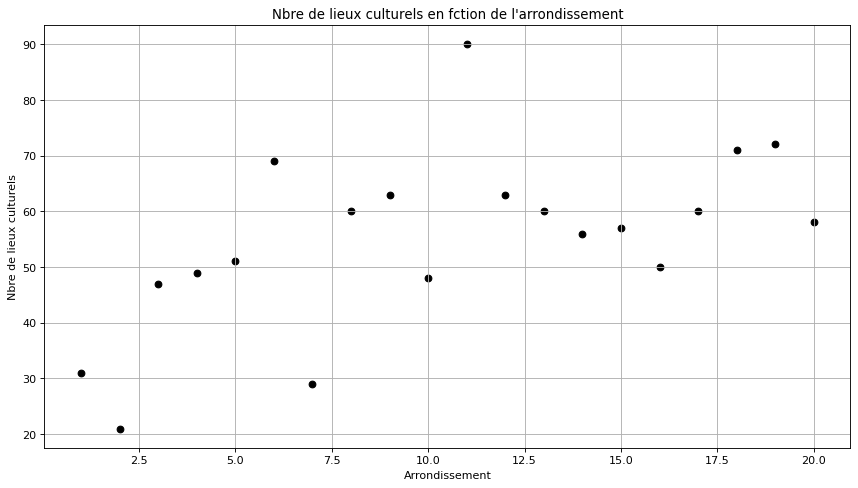

In [146]:
#Representation du nbre de lieux culturels par arrondissement
plt.figure(figsize=(13,7), dpi=80)
plt.scatter(Arr.index, Arr["NOM_LIEU"], marker="o", c="black")
plt.grid(True)
plt.xlabel("Arrondissement")
plt.ylabel("Nbre de lieux culturels")
plt.title("Nbre de lieux culturels en fction de l'arrondissement")

<AxesSubplot:ylabel='Arrondissement'>

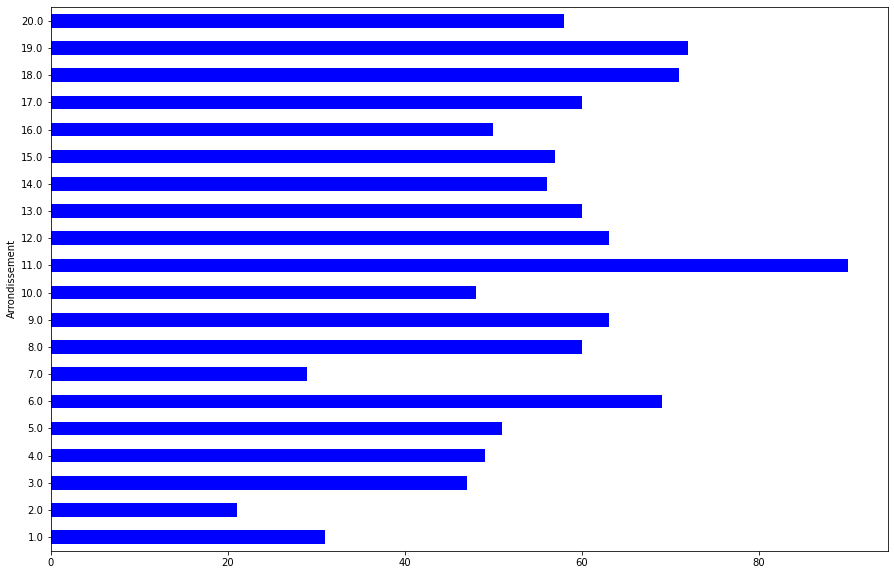

In [147]:
##Representation du nbre de lieux culturels par arrondissement
Arr["NOM_LIEU"].plot(kind="barh", color ="blue", figsize=(15,10))

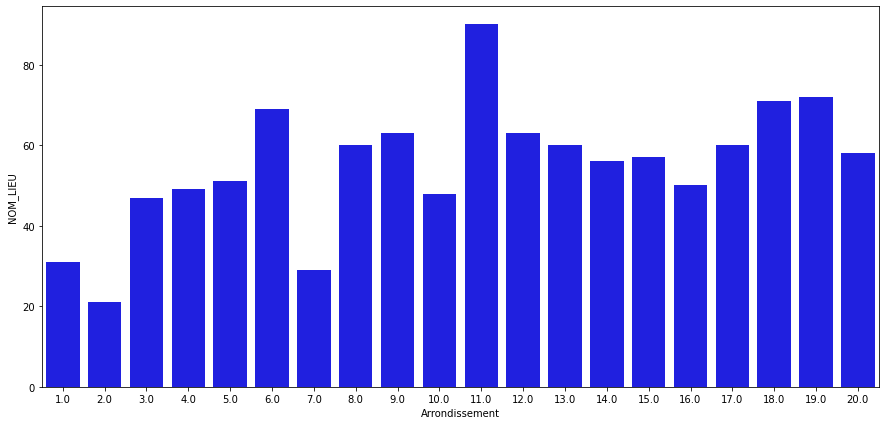

In [148]:
figure=plt.figure(figsize=(15,7))
figure=sns.barplot(x=Arr.index, y=Arr["NOM_LIEU"], color="blue")


In [149]:
#TRANSFORMATION DES COORDONNEES DE LAMBERT À WGS4
coord=df1[["COORD_X","COORD_Y"]]

def coord_float(coord):
    inProj = Proj(init='epsg:2154')
    outProj = Proj(init='epsg:4326')
    for i in range(coord.shape[0]):
        x1,y1 = float(coord.iloc[i,0].replace(",", ".")),float(coord.iloc[i,1].replace(",", "."))
        coord.iloc[i,0],coord.iloc[i,1] = transform(inProj,outProj,x1,y1)
    return coord
coord=coord_float(coord)
#print(coord)
df1["COORD_X"], df1["COORD_Y"] = coord.iloc[:,0], coord.iloc[:,1]

C:\Users\pbarr\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\pbarr\anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-149-09a1a1674285>:9: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  coord.iloc[i,0],coord.iloc[i,1] = trans

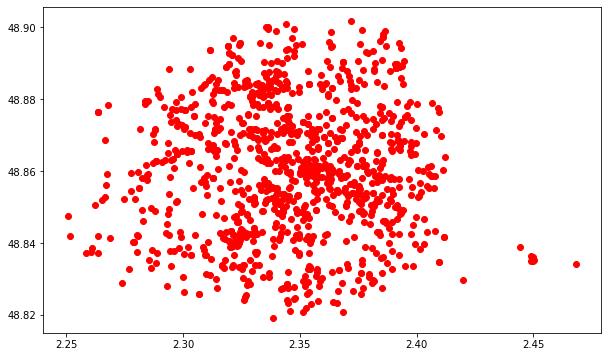

In [150]:
#Représentation de localisation des centres de culture dans Paris
X = df1["COORD_X"]
Y = df1["COORD_Y"]
plt.figure(figsize=(10,6))
plt.scatter(X,Y,color=(1,0,0),marker='o')

In [151]:
#df1[df1["Arrondissement"]==1]["COORD_X"]

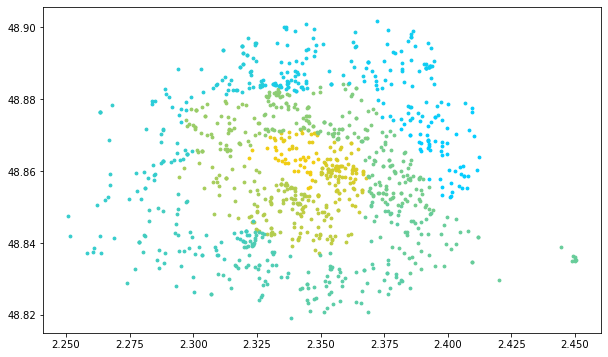

In [152]:
#Représentation lieux culturels par arrondissement pour le fun mdrr
plt.figure(figsize=(10,6))
for i in range(1,21):
    plt.scatter(df1[df1["Arrondissement"]==i]["COORD_X"],df1[df1["Arrondissement"]==i]["COORD_Y"],color=(1-i/20,0.8,i/20),marker='o', s=8)
    

In [153]:
#Etude du rayonnement
df1.groupby(["RAYONNEMENT"]).count()
#df1[df1["RAYONNEMENT"]==0] # on remarque que 1 seul lieu a un rayonnement=0 i.e. lieu fermé
df1[df1["RAYONNEMENT"]==1].head(30)


,NOM_LIEU,DEP,COMMUNE,CODE_INSEE,CODE_POSTAL,RAYONNEMENT,GPE_800M,GPE_STATION,GPE_LIGNE,CARTO_BIB,...,C_DESI,C_LIAISON,L_VOIE,N_SQ_EP,C_NIV1,C_NIV2,C_NIV3,COORD_X,COORD_Y,Arrondissement
347,Aquarium du Trocad�ro - Cin�aqua,75,Paris 16e Arrondissement,75116,75016.0,1.0,Non,NaN,NaN,NaN,...,AV,NaN,ALBERT DE MUN,753001466,13,135,13511,2.2912,48.862472,16.0
349,Arc de Triomphe,75,Paris 8e Arrondissement,75117,75017.0,1.0,Non,NaN,NaN,NaN,...,PL,NaN,CHARLES DE GAULLE,752004433,24,241,24112,2.29504,48.873779,17.0
491,Biblioth�que de la Cit� des Sciences,75,Paris 19e Arrondissement,75119,75019.0,1.0,Non,NaN,NaN,Oui,...,AV,NaN,CORENTIN CARIOU,752003503,13,131,13116,2.387124,48.894925,19.0
556,Biblioth�que Nationale de France Site Fran�ois...,75,Paris 13e Arrondissement,75113,75013.0,1.0,Non,NaN,NaN,Oui,...,QU,NaN,FRANCOIS MAURIAC,752003498,13,131,13116,2.376534,48.834083,13.0
557,Biblioth�que Nationale de France Site Richelieu,75,Paris 2e Arrondissement,75102,75002.0,1.0,Non,NaN,NaN,NaN,...,RUE,,VIVIENNE,753001420,13,133,13321,2.338974,48.867146,2.0
571,Biblioth�que Publique d'Information Centre Pom...,75,Paris 4e Arrondissement,75104,75004.0,1.0,Non,NaN,NaN,Oui,...,RUE,,BEAUBOURG,753002022,13,131,13116,2.352936,48.860509,4.0
641,Caf�-Th��tre du Moulin Rouge,75,Paris 18e Arrondissement,75118,75018.0,1.0,Non,NaN,NaN,NaN,...,BD,DE,CLICHY,753001106,13,133,13312,2.332621,48.884021,18.0
668,Casino de Paris,75,Paris 9e Arrondissement,75109,75009.0,1.0,Non,NaN,NaN,NaN,...,RUE,NaN,CLICHY,752003729,13,133,13312,2.330067,48.878381,9.0
669,Catacombes,75,Paris 14e Arrondissement,75114,75014.0,1.0,Non,NaN,NaN,NaN,...,AV,DU,COLONEL HENRI ROL-TANGUY,752003616,24,241,24112,2.332506,48.833981,14.0
813,Centre National d'Arts et de la Culture George...,75,Paris 4e Arrondissement,75104,75004.0,1.0,Non,NaN,NaN,NaN,...,RUE,NaN,BEAUBOURG,751000469,13,134,13417,2.352751,48.860518,4.0


In [154]:
#chercher les lignes pour lesquelles rayonnement NaN (exemple de la tour Eiffel)
N=df1["RAYONNEMENT"].isnull().values
L=[]
for i in range(0,len(N)):
    if N[i]==True: L.append(i)
L=[df1.iloc[i+1,0] for i in L]
print(L)

["Centre d'Animation Garef A�rospatial", "Centre d'Animation Inter Club 17", "Centre d'Animation La Jonqui�re", "Centre d'Animation Poterne des Peupliers", 'Chant Libre', 'Ecole Normale de Musique de Paris', 'La Petite Acad�mie', 'Acad�mie de Danse AMD - Danse', 'Acad�mie Pliaska - Danse', 'Atelier Anne Leduc', 'Atelier Chor�graphique - Danse', 'Atelier des Epinettes', 'Atelier Jamin', 'Atelier Les Petites Ecuries', 'Atelier Th��tre de Montmartre', 'Ateliers Beaux-Arts de la Ville de Paris', 'Ateliers du Carrousel Les Arts D�coratifs', 'Au Club Montmartrois - Danse', 'Bailly Contemporain', 'Bernheim-Jeune', "Centre d'Animation Antenne Saint-Honor�", "Centre d'Animation Arras", "Centre d'Animation Bercy", "Centre d'Animation Binet", "Centre d'Animation Binet", "Centre d'Animation Brancion", "Centre d'Animation Censier", "Centre d'Animation Charles Hermite", "Centre d'Animation Clavel", "Centre d'Animation Curial", "Centre d'Animation Daviel", "Centre d'Animation des Abbesses", "Centre d

In [155]:
## Chercher un moyen de croiser les données
df1["RAYONNEMENT"].dropna()

1       3.0
2       3.0
7       3.0
8       3.0
9       3.0
       ... 
2515    3.0
2516    3.0
2517    3.0
2519    1.0
2520    1.0
Name: RAYONNEMENT, Length: 951, dtype: float64

In [156]:
x=df1["RAYONNEMENT"].dropna()
y=df1["Arrondissement"].dropna()
X=np.array(df1["RAYONNEMENT"]).reshape((-1,1))
Y=np.array(df1["Arrondissement"])
model=LinearRegression().fit(X,Y)
#model.coef_


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [157]:
dfm1=df[["Identifiant du lieu","Arrondissement", "Coordonnée en X", "Coordonnée en Y"]]
dfm1=dfm1.rename(columns={"Identifiant du lieu":"LIEU","Arrondissement":"ARRONDISSEMENT","Coordonnée en X":"COORD_X", "Coordonnée en Y":"COORD_Y"})
dfm1["CULTURE"]=0
dfm2=df1[["NOM_LIEU", "COORD_X", "COORD_Y", "Arrondissement"]]
dfm2["CULTURE"]=1
dfm2=dfm2.rename(columns={"NOM_LIEU":"LIEU","Arrondissement":"ARRONDISSEMENT"})
dfm=pd.concat([dfm1,dfm2])
dfm

<ipython-input-157-abafc6aca7cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfm2["CULTURE"]=1


,LIEU,ARRONDISSEMENT,COORD_X,COORD_Y,CULTURE
0,2019-173,13,2.352559,48.830116,0
1,2019-176,05,2.351335,48.842919,0
2,2019-515,08,2.30376,48.877212,0
3,2019-522,14,2.334607,48.821424,0
4,2018-819,13,2.378161,48.829173,0
...,...,...,...,...,...
2515,Ya d'la Voix!,11.0,2.380536,48.85054,1
2516,Yamaha Music School,12.0,2.381004,48.838569,1
2517,Yvon Lambert,3.0,2.362822,48.86096,1
2519,Archives Nationales Site Paris,3.0,2.357272,48.859963,1


In [158]:
dfm[dfm["CULTURE"]==1]

,LIEU,ARRONDISSEMENT,COORD_X,COORD_Y,CULTURE
1,Acad�mie de Danse Barbot Perrot - Danse,17.0,2.313647,48.882719,1
2,Acad�mie de Guitare,13.0,2.35412,48.826417,1
7,Association Cours Hippolyte,17.0,2.311275,48.885492,1
8,Atelier d'Artistes,17.0,2.316653,48.882629,1
9,Atelier de Recherche Chor�graphique - Danse,13.0,2.358305,48.827955,1
...,...,...,...,...,...
2515,Ya d'la Voix!,11.0,2.380536,48.85054,1
2516,Yamaha Music School,12.0,2.381004,48.838569,1
2517,Yvon Lambert,3.0,2.362822,48.86096,1
2519,Archives Nationales Site Paris,3.0,2.357272,48.859963,1


In [ ]:
#possibles etudes a faire
#par rayonnement, en particulier le rayonnement 1 qui parait le plus pertinent
#creation de variable de densite de lieux culturels pour chaque lieu de tournage
#creation de variable de distance minimale avec un lieu culturel
#possibles regressions? arrondissement sur nbre lieux culturels, 